# Quantum Phase Estimation for Ground State Energy of H2


In [1]:
import numpy as np
from scipy import linalg, sparse
from itertools import product
from pyscf import gto, scf, ao2mo
import openfermionpyscf as ofpyscf
from openfermion import utils, ops
from openfermion.ops import FermionOperator
import openfermion as opf
from quantum.utils import plotting as PLT
from quantum.qprimitives import mathutils
from quantum import constants

In [5]:
# Set molecule parameters
bond_length = 0.74
geometry = [("H", (0.0, 0.0, -bond_length/2)), ("H", (0.0, 0.0, bond_length/2))]
hamiltonian = ofpyscf.generate_molecular_hamiltonian(geometry, 'sto-3g', multiplicity=1, charge=0)
Hfermion = opf.get_fermion_operator(hamiltonian)

In [91]:
Hmatrix = opf.linalg.get_sparse_operator(Hfermion)
E, _ = np.linalg.eigh(Hmatrix.toarray())

K =  6
Exact Ground State Energy     =  -1.1372838344885017
Estimated Ground State Energy =  -1.1780972450961724


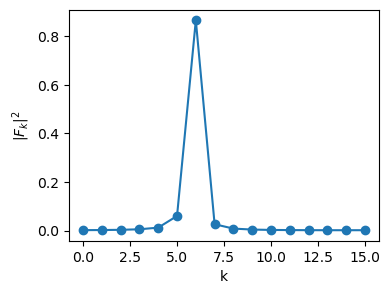

In [96]:
phi = -E[0]/np.pi


PSI = np.zeros(16,dtype=complex)
for m in range(16):
    PSI[m] = np.exp(-1j*m*phi)
#
N = 16
marray = np.arange(16)
f = np.zeros(16,dtype=complex)
for k in range(16):
    f[k] = np.sum( np.exp(1j * 2 * np.pi * marray * (k - N*phi)/N ) ) / N
#
F = np.abs(f)**2
#
K = np.argmax(F)
print('K = ',K)
print('Exact Ground State Energy     = ', E[0])
print('Estimated Ground State Energy = ', -K / N * np.pi)

fig,ax = PLT.subplots(figsize=(4,3),ylabel='$|F_k|^2$',xlabel='k')
ax.plot(F,marker='o')
